**SISTEM REKOMENDASI DESTINASI WISATA PESONA**

---
username : `davidmarioys`


# Data Wrangling
  1. Gathering Data = Mengidentifikasi libraries dan Membaca dataset
  2. Assessing Data = Memeriksa dan memahami data
  3. Cleaning Data = Membersihkan data dari kesalahan/error

## Gathering Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import folium
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Upload Dataset

In [2]:
# Mengunggah file dari komputer lokal
uploaded = files.upload()

Saving Sulawesi.csv to Sulawesi.csv


### Load & Read Dataset

In [3]:
# Load Dataset
df = pd.read_csv('./Sulawesi.csv')

In [4]:
print(f'Dataset PesoNa: \n{df}')

Dataset PesoNa: 
            Provinsi      KabupatenKota  \
0     Sulawesi Utara  Bolaang Mongondow   
1     Sulawesi Utara  Bolaang Mongondow   
2     Sulawesi Utara  Bolaang Mongondow   
3     Sulawesi Utara  Bolaang Mongondow   
4     Sulawesi Utara  Bolaang Mongondow   
...              ...                ...   
2886  Sulawesi Barat    Polewali Mandar   
2887  Sulawesi Barat    Polewali Mandar   
2888  Sulawesi Barat    Polewali Mandar   
2889  Sulawesi Barat    Polewali Mandar   
2890  Sulawesi Barat    Polewali Mandar   

                                  NamaWisata  Rating  Reviews JenisWisata  \
0                          State Parks Lolak     4.1      172       Taman   
1              Kawasan Hijau Bendungan Lolak     5.0        4       Taman   
2                               Saadan yambo     2.0        1       Taman   
3                         Perkebunan Lolayan     4.0        2       Taman   
4                         Rumah boss kambong     5.0        1       Taman   
... 

## Assessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       2891 non-null   object 
 1   KabupatenKota  2891 non-null   object 
 2   NamaWisata     2891 non-null   object 
 3   Rating         2891 non-null   float64
 4   Reviews        2891 non-null   int64  
 5   JenisWisata    2891 non-null   object 
 6   Latitude       2891 non-null   float64
 7   Longitude      2891 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 180.8+ KB


In [6]:
df.describe()

,Rating,Reviews,Latitude,Longitude
count,2891.000000,2891.000000,2891.000000,2891.000000
mean,4.398755,166.805604,-2.294705,121.539376
std,0.521873,686.084232,2.663252,2.018318
min,1.000000,1.000000,-7.381955,118.769347
25%,4.200000,5.000000,-4.723563,119.843372
50%,4.400000,19.000000,-2.994982,120.756896
75%,4.700000,92.000000,0.494601,122.992118
max,5.000000,17742.000000,5.565316,127.116934


In [7]:
print('IDENTIFIKASI DATA')
print(f'\nData Kosong: {df.isnull().sum().sum()}')
print(f'Data Duplikat: {df.duplicated().sum()}')
print(f'Jumlah Data: {df.shape[0]}')
print(f'Jumlah Kolom: {df.shape[1]}')

IDENTIFIKASI DATA

Data Kosong: 0
Data Duplikat: 123
Jumlah Data: 2891
Jumlah Kolom: 8


Dataset Sulawesi tidak memiliki data kosong namun memiliki sejumlah 123 data duplikat, dengan total data sebanyak 2891 pada 8 kolom.

In [8]:
print(f'Kolom: {df.columns.tolist()}')
print(f'\nJumlah Nilai Unique: \n{df.nunique()}')

Kolom: ['Provinsi', 'KabupatenKota', 'NamaWisata', 'Rating', 'Reviews', 'JenisWisata', 'Latitude', 'Longitude']

Jumlah Nilai Unique: 
Provinsi            6
KabupatenKota      78
NamaWisata       2673
Rating             27
Reviews           486
JenisWisata         5
Latitude         2689
Longitude        2687
dtype: int64


### Visualisasi Data Awal

VISUALISASI DATA



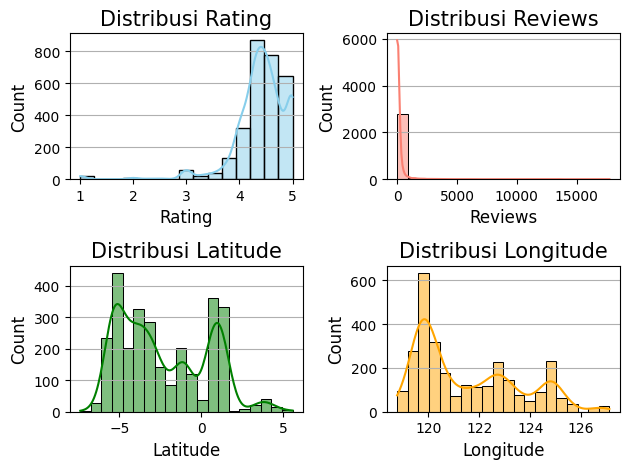

In [9]:
print('VISUALISASI DATA\n')

# Subplot untuk Rating
plt.subplot(2, 2, 1)
sns.histplot(df['Rating'], kde=True, color='skyblue', bins=15)
plt.title('Distribusi Rating', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Reviews
plt.subplot(2, 2, 2)
sns.histplot(df['Reviews'], kde=True, color='salmon', bins=20)
plt.title('Distribusi Reviews', fontsize=15)
plt.xlabel('Reviews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Latitude
plt.subplot(2, 2, 3)
sns.histplot(df['Latitude'], kde=True, color='green', bins=20)
plt.title('Distribusi Latitude', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Longitude
plt.subplot(2, 2, 4)
sns.histplot(df['Longitude'], kde=True, color='orange', bins=20)
plt.title('Distribusi Longitude', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Matriks Korelasi

In [10]:
# Filter kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi
correlation_matrix = df[numeric_columns].corr()

print("Matrix Korelasi Antar Variabel Numerik:")
print(correlation_matrix)

Matrix Korelasi Antar Variabel Numerik:
             Rating   Reviews  Latitude  Longitude
Rating     1.000000  0.013161  0.084435   0.096408
Reviews    0.013161  1.000000 -0.080699  -0.083658
Latitude   0.084435 -0.080699  1.000000   0.697087
Longitude  0.096408 -0.083658  0.697087   1.000000


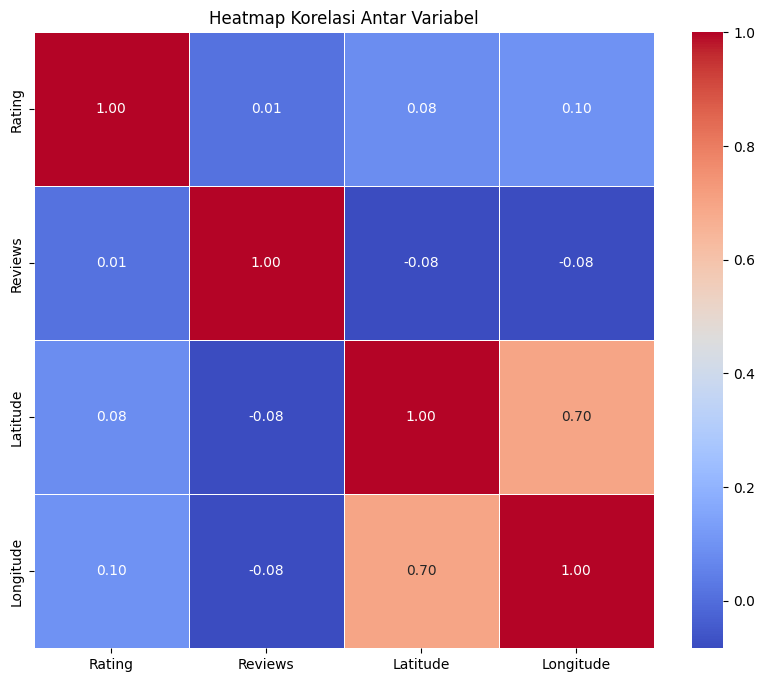

In [11]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

## Cleaning Data

### Penanganan Data Kosong

In [12]:
print('Menghapus Data Kosong')

# Drop rows with missing values
df.dropna(inplace=True)

# Check for missing values after dropping rows
print(df.isnull().sum())

print(f'\nIdentifikasi Data Kosong: {df.isnull().sum().sum()}')

Menghapus Data Kosong
Provinsi         0
KabupatenKota    0
NamaWisata       0
Rating           0
Reviews          0
JenisWisata      0
Latitude         0
Longitude        0
dtype: int64

Identifikasi Data Kosong: 0


### Penanganan Data Duplikat

In [13]:
print('Menghapus Data Duplikat')

# hapus data duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

print(f'\nIdentifikasi Data Duplikat: {df.duplicated().sum().sum()}')

Menghapus Data Duplikat

Identifikasi Data Duplikat: 0


## Penanganan Nilai yang Hilang

In [14]:
# Memeriksa apakah ada nilai yang hilang
print(f'Identifikasi Nilai Hilang: {df.isnull().sum().sum()}')

Identifikasi Nilai Hilang: 0


### Penanganan Nilai Outlier

In [15]:
# Convert potentially problematic columns to numeric types
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

print('Identifikasi Data Outlier')
numeric_columns = ['Reviews', 'Rating', 'Latitude', 'Longitude']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_columns = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
outliers = df[outlier_columns]

print(f'Jumlah Data Outlier: {outliers.shape[0]}')
print(f'\nData Outlier: \n{outliers}')

Identifikasi Data Outlier
Jumlah Data Outlier: 486

Data Outlier: 
            Provinsi            KabupatenKota  \
2     Sulawesi Utara        Bolaang Mongondow   
19    Sulawesi Utara        Bolaang Mongondow   
41    Sulawesi Utara        Bolaang Mongondow   
48    Sulawesi Utara        Bolaang Mongondow   
75    Sulawesi Utara  Bolaang Mongondow Timur   
...              ...                      ...   
2868  Sulawesi Barat          Polewali Mandar   
2871  Sulawesi Barat          Polewali Mandar   
2874  Sulawesi Barat          Polewali Mandar   
2879  Sulawesi Barat          Polewali Mandar   
2882  Sulawesi Barat          Polewali Mandar   

                                 NamaWisata  Rating  Reviews JenisWisata  \
2                              Saadan yambo     2.0        1       Taman   
19                    Air Terjun Molipungan     2.5        2         Air   
41    Wisata Pantai Pasir Putih Mariri Baru     2.0        1         Air   
48                      Merajan mergan s

In [16]:
# Fungsi untuk menghapus outlier secara berulang
def remove_outliers(df, numeric_columns):
    while True:
        Q1 = df[numeric_columns].quantile(0.25)
        Q3 = df[numeric_columns].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_columns = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
        outliers = df[outlier_columns]

        if outliers.empty:
            break

        df = df[~outlier_columns]

    return df

# Menghapus outlier secara berulang
df_cleaned = remove_outliers(df, numeric_columns)

print(f'Jumlah Data Asli {df.shape}')
print(f'Jumlah Data Setelah Hapus Outlier {df_cleaned.shape}')

Jumlah Data Asli (2768, 8)
Jumlah Data Setelah Hapus Outlier (1474, 8)


In [17]:
print("Data setelah menghapus outlier:")
print(df_cleaned)

Data setelah menghapus outlier:
            Provinsi      KabupatenKota  \
1     Sulawesi Utara  Bolaang Mongondow   
3     Sulawesi Utara  Bolaang Mongondow   
4     Sulawesi Utara  Bolaang Mongondow   
5     Sulawesi Utara  Bolaang Mongondow   
6     Sulawesi Utara  Bolaang Mongondow   
...              ...                ...   
2885  Sulawesi Barat    Polewali Mandar   
2887  Sulawesi Barat    Polewali Mandar   
2888  Sulawesi Barat    Polewali Mandar   
2889  Sulawesi Barat    Polewali Mandar   
2890  Sulawesi Barat    Polewali Mandar   

                                  NamaWisata  Rating  Reviews JenisWisata  \
1              Kawasan Hijau Bendungan Lolak     5.0        4       Taman   
3                         Perkebunan Lolayan     4.0        2       Taman   
4                         Rumah boss kambong     5.0        1       Taman   
5                Taman Hutan Mangrove Dudepo     4.0        6       Taman   
6                           Taman Pobundayan     4.5       10     

### Matriks Korelasi Data Sesudah Diolah

In [18]:
# Filter kolom numerik
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi
correlation_matrix = df_cleaned[numeric_columns].corr()

print("Matrix Korelasi Antar Variabel Numerik:")
print(correlation_matrix)

Matrix Korelasi Antar Variabel Numerik:
             Rating   Reviews  Latitude  Longitude
Rating     1.000000 -0.308007  0.081939   0.088860
Reviews   -0.308007  1.000000 -0.106756  -0.039928
Latitude   0.081939 -0.106756  1.000000   0.688548
Longitude  0.088860 -0.039928  0.688548   1.000000


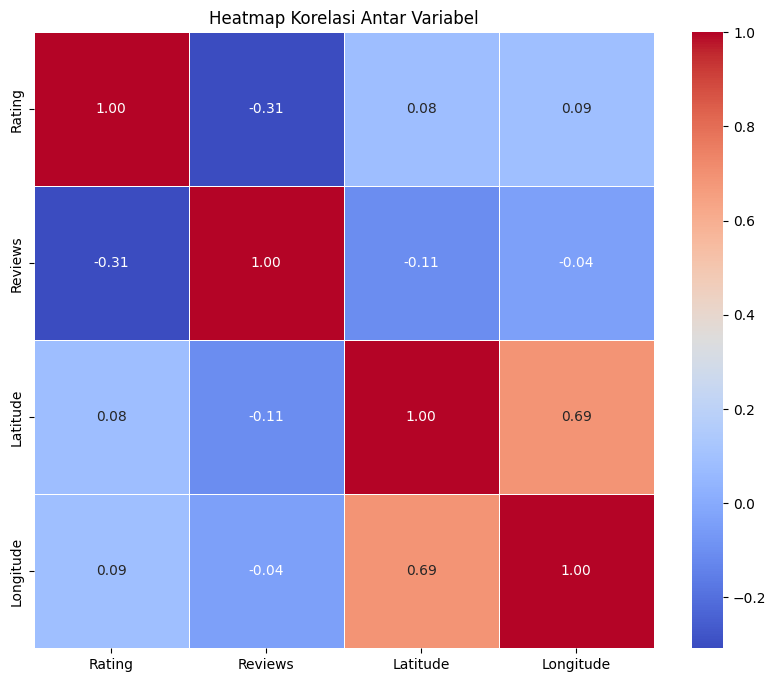

In [19]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Terdapat perubahan dari hasil matriks korelasi, yaitu:

| Variabel   | Korelasi (Orisinil) | Korelasi (Setelah Diolah) | Perubahan |
|------------|----------------------|---------------------------|-----------|
| Rating     | 1.000000             | 1.000000                  | -         |
| Reviews    | 0.013161             | -0.308007                 | Lebih rendah dan negatif setelah pengolahan data, menunjukkan hubungan yang lebih kuat dalam arah yang berlawanan antara Rating dan Reviews. |
| Latitude   | 0.084435             | 0.081939                  | Sedikit berubah, tetapi tetap positif, menunjukkan hubungan yang tetap antara Latitude dengan variabel lainnya meskipun ada pengolahan data. |
| Longitude  | 0.096408             | 0.088860                  | Sedikit berubah, tetapi tetap positif, menunjukkan hubungan yang tetap antara Longitude dengan variabel lainnya meskipun ada pengolahan data. |

Korelasi antara Rating dan Reviews mengalami perubahan drastis setelah pengolahan data, menjadi lebih negatif, menunjukkan bahwa transformasi atau pengolahan data telah mempengaruhi cara variabel-variabel ini berinteraksi dalam analisis korelasi. Korelasi antara Latitude dan Longitude, meskipun mengalami sedikit perubahan, tetap menunjukkan hubungan yang stabil dengan variabel lainnya setelah pengolahan data.

## Exploratory Data Analysis (EDA)

### Visualisasi Data

VISUALISASI DATA



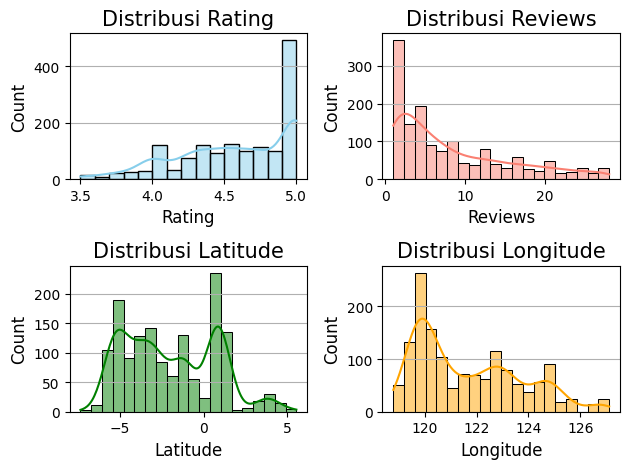

In [20]:
print('VISUALISASI DATA\n')

# Subplot untuk Rating
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Rating'], kde=True, color='skyblue', bins=15)
plt.title('Distribusi Rating', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Reviews
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Reviews'], kde=True, color='salmon', bins=20)
plt.title('Distribusi Reviews', fontsize=15)
plt.xlabel('Reviews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Latitude
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Latitude'], kde=True, color='green', bins=20)
plt.title('Distribusi Latitude', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Longitude
plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Longitude'], kde=True, color='orange', bins=20)
plt.title('Distribusi Longitude', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

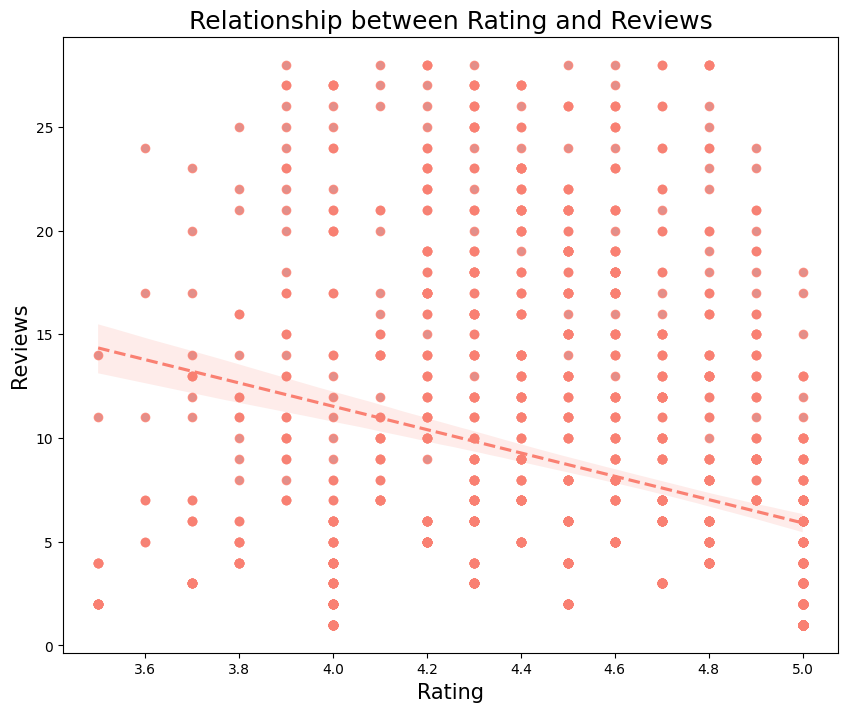

Correlation between Rating and Reviews: -0.308


In [21]:
# Create a scatter plot with Rating on the x-axis and Reviews on the y-axis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Rating', y='Reviews', data=df_cleaned, color='skyblue')

# Add a regression line to the scatter plot
sns.regplot(x='Rating', y='Reviews', data=df_cleaned, color='salmon', line_kws={'linestyle': '--'})

# Set labels and title
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Reviews', fontsize=15)
plt.title('Relationship between Rating and Reviews', fontsize=18)

# Show the plot
plt.show()

# Calculate the correlation coefficient between Rating and Reviews
correlation = df_cleaned['Rating'].corr(df_cleaned['Reviews'])

# Print the correlation coefficient
print(f'Correlation between Rating and Reviews: {correlation:.3f}')


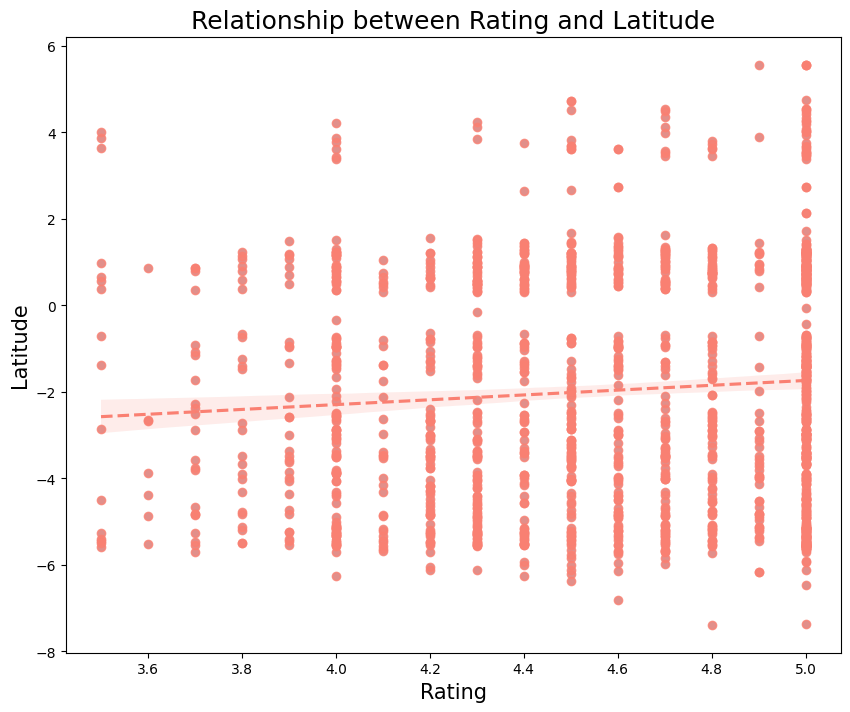

Correlation between Rating and Latitude: 0.082


In [22]:
# Create a scatter plot with Rating on the x-axis and Latitude on the y-axis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Rating', y='Latitude', data=df_cleaned, color='skyblue')

# Add a regression line to the scatter plot
sns.regplot(x='Rating', y='Latitude', data=df_cleaned, color='salmon', line_kws={'linestyle': '--'})

# Set labels and title
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Relationship between Rating and Latitude', fontsize=18)

# Show the plot
plt.show()

# Calculate the correlation coefficient between Rating and Latitude
correlation = df_cleaned['Rating'].corr(df_cleaned['Latitude'])

# Print the correlation coefficient
print(f'Correlation between Rating and Latitude: {correlation:.3f}')

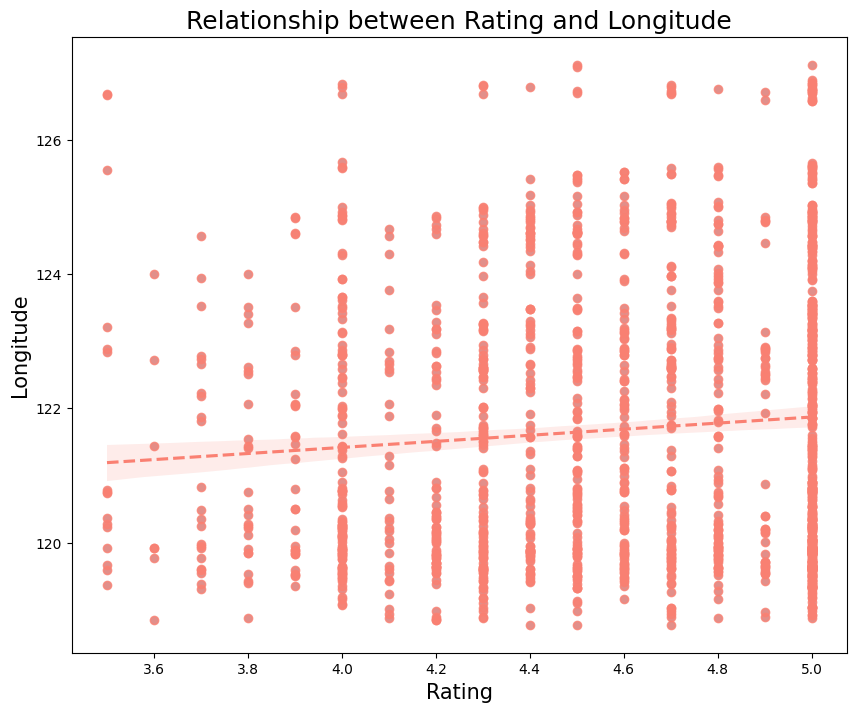

Correlation between Rating and Longitude: 0.089


In [23]:
# Create a scatter plot with Rating on the x-axis and Longitude on the y-axis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Rating', y='Longitude', data=df_cleaned, color='skyblue')

# Add a regression line to the scatter plot
sns.regplot(x='Rating', y='Longitude', data=df_cleaned, color='salmon', line_kws={'linestyle': '--'})

# Set labels and title
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Longitude', fontsize=15)
plt.title('Relationship between Rating and Longitude', fontsize=18)

# Show the plot
plt.show()

# Calculate the correlation coefficient between Rating and Longitude
correlation = df_cleaned['Rating'].corr(df_cleaned['Longitude'])

# Print the correlation coefficient
print(f'Correlation between Rating and Longitude: {correlation:.3f}')

### Jumlah Data Pada Fitur

In [24]:
df_cleaned['Provinsi'].value_counts()

Provinsi
Sulawesi Selatan     489
Sulawesi Tengah      321
Sulawesi Utara       294
Sulawesi Tenggara    180
Sulawesi Barat        97
Gorontalo             93
Name: count, dtype: int64

In [25]:
df_cleaned['KabupatenKota'].value_counts()

KabupatenKota
Minahasa             51
Banggai Kepulauan    46
Poso                 42
Tolitoli             41
Bolaang Mongondow    40
                     ..
Makassar              3
Kota Manado           3
Bitung                2
Kolaka Timur          2
Buton Tengah          1
Name: count, Length: 76, dtype: int64

In [26]:
df_cleaned['JenisWisata'].value_counts()

JenisWisata
Air        838
Taman      268
Bukit      181
Monumen    116
Religi      71
Name: count, dtype: int64

In [27]:
# Menghitung jumlah data pada kolom 'Rating' berdasarkan jumlah bintang
rating_counts = df_cleaned['Rating'].value_counts().sort_index()

# Menampilkan jumlah data untuk setiap jumlah bintang
print("Jumlah data berdasarkan jumlah bintang pada Rating:")
for rating, count in rating_counts.items():
    print(f"Rating {rating}: {count} data")

Jumlah data berdasarkan jumlah bintang pada Rating:
Rating 3.5: 16 data
Rating 3.6: 7 data
Rating 3.7: 23 data
Rating 3.8: 25 data
Rating 3.9: 30 data
Rating 4.0: 121 data
Rating 4.1: 32 data
Rating 4.2: 75 data
Rating 4.3: 121 data
Rating 4.4: 94 data
Rating 4.5: 124 data
Rating 4.6: 100 data
Rating 4.7: 115 data
Rating 4.8: 100 data
Rating 4.9: 48 data
Rating 5.0: 443 data


# Data Preprocessing

In [28]:
# Membuat peta sebaran geografis tempat wisata
map_sulawesi = folium.Map(location=[-8.123528019761865, 115.06461953075772], zoom_start=6)
for _, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['NamaWisata']).add_to(map_sulawesi)

map_sulawesi

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1474 entries, 1 to 2890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       1474 non-null   object 
 1   KabupatenKota  1474 non-null   object 
 2   NamaWisata     1474 non-null   object 
 3   Rating         1474 non-null   float64
 4   Reviews        1474 non-null   int64  
 5   JenisWisata    1474 non-null   object 
 6   Latitude       1474 non-null   float64
 7   Longitude      1474 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 103.6+ KB


### Scaling Fitur Numerik

In [30]:
# Pilih fitur numerik yang akan di-scaling
numerical_features = ['Rating', 'Reviews', 'Latitude', 'Longitude']

# Buat objek MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling pada fitur numerik
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Tampilkan data yang sudah di-scaling
print("Data setelah scaling:")
print(df_cleaned[numerical_features].head())

Data setelah scaling:
     Rating   Reviews  Latitude  Longitude
1  1.000000  0.111111  0.632233   0.634617
3  0.333333  0.037037  0.620289   0.663854
4  1.000000  0.000000  0.619640   0.673201
5  0.333333  0.185185  0.597162   0.616557
6  0.666667  0.333333  0.625242   0.662550


### Feature Engineering - Encoding

In [31]:
# Buat objek LabelEncoder
label_encoder = LabelEncoder()

# Lakukan encoding pada kolom 'JenisWisata'
df_cleaned['JenisWisata_Encoded'] = label_encoder.fit_transform(df_cleaned['JenisWisata'])

# Simpan mapping dari label ke nilai numerik
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Tampilkan mapping
print("Mapping JenisWisata:")
print(label_mapping)

Mapping JenisWisata:
{'Air': 0, 'Bukit': 1, 'Monumen': 2, 'Religi': 3, 'Taman': 4}


In [32]:
df_cleaned

,Provinsi,KabupatenKota,NamaWisata,Rating,Reviews,JenisWisata,Latitude,Longitude,JenisWisata_Encoded
1,Sulawesi Utara,Bolaang Mongondow,Kawasan Hijau Bendungan Lolak,1.000000,0.111111,Taman,0.632233,0.634617,4
3,Sulawesi Utara,Bolaang Mongondow,Perkebunan Lolayan,0.333333,0.037037,Taman,0.620289,0.663854,4
4,Sulawesi Utara,Bolaang Mongondow,Rumah boss kambong,1.000000,0.000000,Taman,0.619640,0.673201,4
5,Sulawesi Utara,Bolaang Mongondow,Taman Hutan Mangrove Dudepo,0.333333,0.185185,Taman,0.597162,0.616557,4
6,Sulawesi Utara,Bolaang Mongondow,Taman Pobundayan,0.666667,0.333333,Taman,0.625242,0.662550,4
...,...,...,...,...,...,...,...,...,...
2885,Sulawesi Barat,Polewali Mandar,Masjid Besar Al-Hurriyyah Tinambung,0.800000,0.074074,Religi,0.299353,0.029235,3
2887,Sulawesi Barat,Polewali Mandar,Masjid Baiturrahman Dusun Ba'barura,1.000000,0.037037,Religi,0.298804,0.030283,3
2888,Sulawesi Barat,Polewali Mandar,Masjid Nurut Taqwa,0.400000,0.407407,Religi,0.298524,0.027816,3
2889,Sulawesi Barat,Polewali Mandar,Gereja Gpdi Filadelfia Polewali Mandar,0.533333,0.592593,Religi,0.306012,0.066613,3


In [35]:
# Split data into training and test sets
X = df_cleaned[['Rating', 'Reviews', 'Latitude', 'Longitude', 'JenisWisata_Encoded']]
y = df_cleaned['Rating']  # Assuming 'Rating' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model untuk mendapatkan representasi vektor
input_layer = Input(shape=(5,))
embedding_layer = Dense(64, activation='relu')(input_layer)
embedding_layer = Dense(32, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='linear')(embedding_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Training model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[reduce_lr, early_stop])

# Mendapatkan representasi vektor dari data
feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_embedding = feature_model.predict(X_train)
X_test_embedding = feature_model.predict(X_test)

Epoch 1/100
37/37 [==============================] - 2s 17ms/step - loss: 0.1257 - mae: 0.2734 - val_loss: 0.0289 - val_mae: 0.1373 - lr: 0.0010
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0124 - mae: 0.0842 - val_loss: 0.0048 - val_mae: 0.0504 - lr: 0.0010
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0401 - val_loss: 0.0018 - val_mae: 0.0326 - lr: 0.0010
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0012 - mae: 0.0254 - val_loss: 8.0051e-04 - val_mae: 0.0210 - lr: 0.0010
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 5.6454e-04 - mae: 0.0182 - val_loss: 4.0813e-04 - val_mae: 0.0146 - lr: 0.0010
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 3.2288e-04 - mae: 0.0136 - val_loss: 3.4155e-04 - val_mae: 0.0131 - lr: 0.0010
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 2.4567e-04 - mae: 0.0119 - val_loss: 2.776

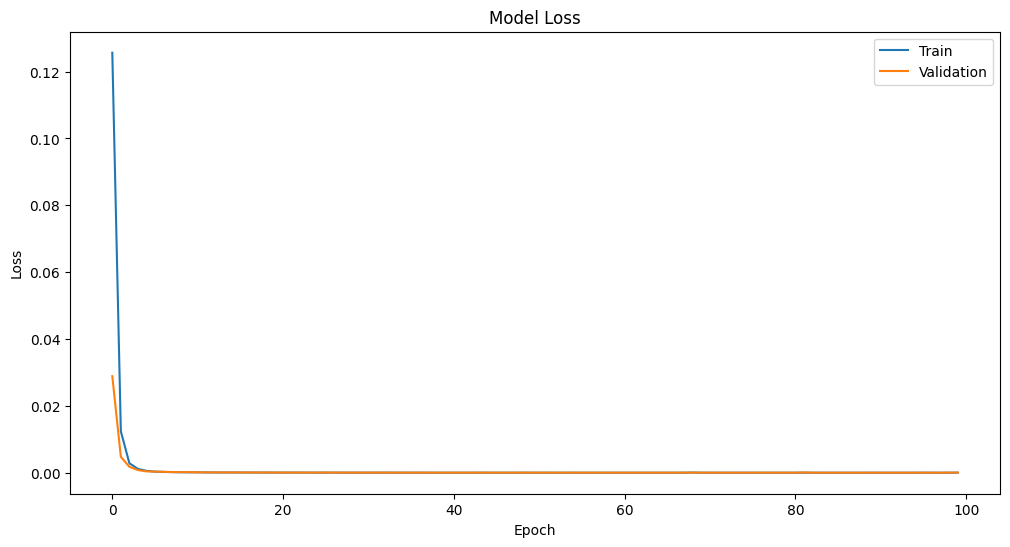

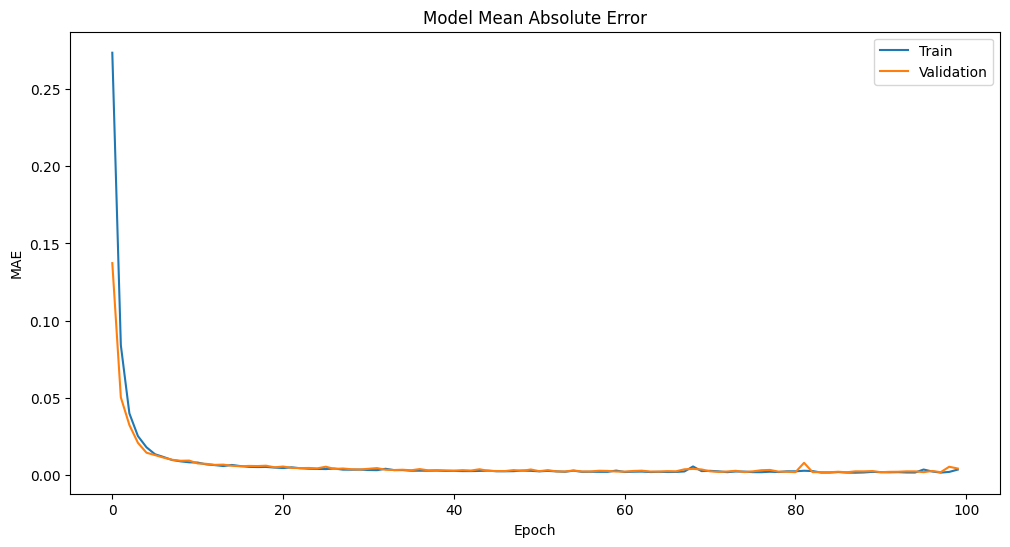

Test Loss: 3.615321111283265e-05
Test MAE: 0.0044000474736094475


In [36]:
# Melihat hasil training model dengan detil dan menarik

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluasi model pada data test
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test MAE:', test_mae)


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung kemiripan menggunakan cosine similarity
similarity_matrix = cosine_similarity(X_train_embedding)

def get_recommendations(place_id, similarity_matrix, df, top_n=5):
    similarity_scores = list(enumerate(similarity_matrix[place_id]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_places = similarity_scores[1:top_n+1]
    recommended_places = [df.iloc[i[0]]['NamaWisata'] for i in top_places]
    return recommended_places

# Contoh penggunaan fungsi rekomendasi
place_id = 124
recommended_places = get_recommendations(place_id, similarity_matrix, df_cleaned, top_n=5)
print(f'Rekomendasi Wisata: {recommended_places}')

Rekomendasi Wisata: ['Pantai Bonepute', 'Puncak Battoa', 'Objek Wisata Tulaklangi Talion', 'Pantai Indah Wolo', 'Air Terjun Dodandian']


In [38]:
from geopy.distance import geodesic

def get_hybrid_recommendations(place_id, similarity_matrix, df, top_n=5):
    # Mendapatkan rekomendasi berdasarkan kemiripan
    recommended_places = get_recommendations(place_id, similarity_matrix, df, top_n)

    # Mendapatkan lokasi tempat wisata acuan
    base_place_coords = df.iloc[place_id][['Latitude', 'Longitude']].values

    # Menghitung jarak ke tempat wisata yang direkomendasikan
    distances = []
    for place in recommended_places:
        place_coords = df[df['NamaWisata'] == place][['Latitude', 'Longitude']].values[0]
        distance = geodesic(base_place_coords, place_coords).kilometers
        distances.append((place, distance))

    # Mengurutkan tempat wisata berdasarkan jarak terdekat
    distances = sorted(distances, key=lambda x: x[1])

    # Mengembalikan daftar tempat wisata yang direkomendasikan berdasarkan jarak terdekat
    return [place for place, distance in distances]

# Contoh penggunaan fungsi hybrid rekomendasi
place_id = 124
hybrid_recommended_places = get_hybrid_recommendations(place_id, similarity_matrix, df_cleaned, top_n=5)
print("Rekomendasi Hybrid:")
for place in hybrid_recommended_places:
    print(place)

Rekomendasi Hybrid:
Air Terjun Dodandian
Pantai Bonepute
Pantai Indah Wolo
Objek Wisata Tulaklangi Talion
Puncak Battoa


In [39]:
def evaluate_model(df, similarity_matrix, k=5):
    precision_scores = []
    mae_scores = []

    # Iterate up to the size of the similarity matrix to avoid index errors
    for idx in range(len(similarity_matrix)):
        actual_place = df.iloc[idx]['NamaWisata']
        recommended_places = get_hybrid_recommendations(idx, similarity_matrix, df, top_n=k)

        # Precision@K
        if actual_place in recommended_places:
            precision_scores.append(1)
        else:
            precision_scores.append(0)

        # MAE untuk jarak
        actual_coords = df.iloc[idx][['Latitude', 'Longitude']].values.astype(np.float32) # Cast to float32
        recommended_coords = df[df['NamaWisata'].isin(recommended_places)][['Latitude', 'Longitude']].values.astype(np.float32) # Cast to float32
        distances = np.linalg.norm(recommended_coords - actual_coords, axis=1)
        mae = np.mean(distances)
        mae_scores.append(mae)

    precision_at_k = np.mean(precision_scores)
    mean_absolute_error_distance = np.mean(mae_scores)

    return precision_at_k, mean_absolute_error_distance

precision_at_k, mean_absolute_error_distance = evaluate_model(df_cleaned, similarity_matrix, k=5)
print(f"Precision@K: {precision_at_k}")
print(f"Mean Absolute Error (MAE) untuk jarak: {mean_absolute_error_distance}")

Precision@K: 0.018659881255301103
Mean Absolute Error (MAE) untuk jarak: 0.39262354373931885
